This summarizes the process and findings of building different models on the bike rental data

## **Data**

- **Date**: 
- **Bike**: Response variable, bike rental count
- **Hour**: Hour of the day, from 0 to 23
- **Temperature**: 
- **Humidity**: 
- **Wind_Speed**: 
- **Visibility**: 
- **Dew_point_temperature**: A quantity calculated from temperature and humidity
- **Solar_Radiation**: 
- **Rainfall**: 
- **Snowfall**: 
- **Holiday**: 
- **Functioning_Day**: 
- **Weekday**: A custom variable to indicate day of the week

### **Data Inspection**
1. ***Dew_point_temperature*** is calculated directly from temperature and humidity, i.e. $T_{dp} \approx T - \frac{100 - RH}{5}$. Should watch for strong collinearity. Dew point temperature, temperature, and humidity are related meteorological variables that describe the state of the atmosphere in terms of moisture content.


## **Inspection and Cleaning**

In [1]:
# Import the necessary libraries
from google.colab import drive
import pandas as pd

# Mount Google Drive to access the CSV file
drive.mount('/content/drive')

# Set the path to the CSV file in Google Drive, please change it to local file address if you run it locally
file_path = '/content/drive/MyDrive/Group4BikeDataAutumn_Revised.csv'

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)

# Display the first five rows of the DataFrame
df.head()

Mounted at /content/drive


,Date,Bike,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Holiday,Functioning_Day,Weekday
0,9/1/2018,1892,18,28.8,46,1.3,2000,16.0,0.58,0.0,0.0,No Holiday,Yes,Saturday
1,9/1/2018,1891,19,27.8,48,1.1,2000,15.7,0.08,0.0,0.0,No Holiday,Yes,Saturday
2,9/1/2018,1845,17,29.6,42,1.3,2000,15.3,0.98,0.0,0.0,No Holiday,Yes,Saturday
3,9/1/2018,1678,16,30.5,41,1.4,1930,15.7,1.95,0.0,0.0,No Holiday,Yes,Saturday
4,9/1/2018,1523,23,24.4,54,1.6,2000,14.4,0.00,0.0,0.0,No Holiday,Yes,Saturday


In [ ]:
# Length of data is 1937
len(df)

1937

In [ ]:
# No data where Y=0
sum(df['Bike'] == 0)

0

### **Observations**

In [ ]:
# Looking at the descriptive statistics of the data
df.describe(include='all')

,Date,Bike,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Holiday,Functioning_Day,Weekday
count,1937,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937,1937,1937
unique,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,7
top,9/1/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Holiday,Yes,Monday
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1841,1937,312
mean,NaN,924.110480,11.530718,13.821683,59.044915,1.492101,1558.174497,5.150594,0.522783,0.117656,0.063500,NaN,NaN,NaN
std,NaN,617.547879,6.916504,7.244204,19.058618,0.916309,565.765000,8.111224,0.803732,0.889771,0.521743,NaN,NaN,NaN
min,NaN,2.000000,0.000000,-3.000000,13.000000,0.000000,33.000000,-19.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,427.000000,6.000000,7.900000,44.000000,0.900000,1177.000000,0.100000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,856.000000,12.000000,13.300000,59.000000,1.300000,1901.000000,4.800000,0.000000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1271.000000,18.000000,19.800000,74.000000,2.000000,2000.000000,10.600000,0.890000,0.000000,0.000000,NaN,NaN,NaN


**Abnormalities**

1. ***Solar_Radiation***, ***Rainfall***, ***Snowfall***, all highly skewed to the left, only a few data larger than 0.

## **Feature Engineering**

1. Excluded ***Functioning_Day***, ***Date***
2. Kept ***Weekday*** as it is
3. Created dummies for ***Holiday***, ***Weekday***

In [2]:
from sklearn.preprocessing import OneHotEncoder

df = df.drop(['Functioning_Day', 'Date'], axis=1)

# convert Hour to clusters
# df['TimeoftheDay'] = pd.cut(df['Hour'], bins=[-1, 6, 12, 18, 24], labels=['night', 'morning', 'afternoon', 'evening'], ordered=False)

# Convert the categorical variable using label encoding
# encoder = OneHotEncoder()
# # fit and transform the data
# encoded_data = encoder.fit_transform(df[['Holiday', 'Weekday']])

# # get the feature names
# feature_names = []
# for feature in encoder.categories_:
#     feature_names += list(feature)
# encoded_df.columns = feature_names

# Create dummy variables
holiday_map = {'Holiday': 1, 'No Holiday': 0}
# define a dictionary to map weekday names to numbers
weekday_map = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}

# apply the mapping to the weekday and holiday column
df['Weekday'] = df['Weekday'].apply(lambda x: weekday_map[x])
df['Holiday'] = df['Holiday'].apply(lambda x: holiday_map[x])

In [ ]:
df.head(5)

,Bike,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Holiday,Weekday
0,1892,18,28.8,46,1.3,2000,16.0,0.58,0.0,0.0,0,6
1,1891,19,27.8,48,1.1,2000,15.7,0.08,0.0,0.0,0,6
2,1845,17,29.6,42,1.3,2000,15.3,0.98,0.0,0.0,0,6
3,1678,16,30.5,41,1.4,1930,15.7,1.95,0.0,0.0,0,6
4,1523,23,24.4,54,1.6,2000,14.4,0.00,0.0,0.0,0,6


In [3]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Split the dataset into training and testing sets, dropping 'Dew_point_temperature'
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['Bike', 'Dew_point_temperature'], axis=1),
                                                    df['Bike'],
                                                    test_size=0.25,
                                                    random_state=42)

# add a constant
X_train_constant = sm.add_constant(X_train) # add an intercept column to the dataset
X_test_constant = sm.add_constant(X_test) # add an intercept column to the dataset

In [ ]:
# check for NA data, none is found
df[df.isnull().any(axis=1)]

,Bike,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Holiday,Weekday


In [ ]:
# # convert the date column to datetime format
# df['Date'] = pd.to_datetime(df['Date'])

# # extract the day, month, and year from the date column
# df['day'] = df['Date'].dt.day
# df['month'] = df['Date'].dt.month
# df['year'] = df['Date'].dt.year

### **Regress *Dew_point_temperature* on *Temperature* and *Humidity***

In [ ]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
x_tp, y_tp = df[['Temperature', 'Humidity']], df['Dew_point_temperature']

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# add a constant
x_tp_constant = sm.add_constant(x_tp) # add an intercept column to the dataset

# create a summary table using statsmodels
est_tp = sm.OLS(y_tp, x_tp_constant).fit() # fit a linear regression model using statsmodels
summary_tp = est_tp.summary() # create a summary table

# print the summary table
print(summary_tp)

                              OLS Regression Results                             
Dep. Variable:     Dew_point_temperature   R-squared:                       0.987
Model:                               OLS   Adj. R-squared:                  0.987
Method:                    Least Squares   F-statistic:                 7.276e+04
Date:                   Sun, 30 Apr 2023   Prob (F-statistic):               0.00
Time:                           17:37:45   Log-Likelihood:                -2605.2
No. Observations:                   1937   AIC:                             5216.
Df Residuals:                       1934   BIC:                             5233.
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -23.14

**Observation**
- The model has very high $R^2$, and the equation yielded is $Dew = -23.14 + 0.93\times Temp + 0.26\times Himidity$, which is very close to the formula mentioned before. So it is a linear combination of the other 2 and we should consider dropping *Dew* or the other two.

## **Exploratory analysis**

### **Check distribution of Y**

(array([45., 48., 84., 71., 54., 46., 50., 51., 42., 60., 56., 69., 50.,
        57., 65., 66., 62., 57., 45., 40., 19., 33., 34., 32., 19., 20.,
        16., 15., 24., 15., 23., 17., 12.,  9.,  9.,  7.,  6.,  5.,  2.,
         5.,  0.,  1.,  2.,  1.,  0.,  0.,  0.,  5.,  0.,  3.]),
 array([   4.  ,   69.88,  135.76,  201.64,  267.52,  333.4 ,  399.28,
         465.16,  531.04,  596.92,  662.8 ,  728.68,  794.56,  860.44,
         926.32,  992.2 , 1058.08, 1123.96, 1189.84, 1255.72, 1321.6 ,
        1387.48, 1453.36, 1519.24, 1585.12, 1651.  , 1716.88, 1782.76,
        1848.64, 1914.52, 1980.4 , 2046.28, 2112.16, 2178.04, 2243.92,
        2309.8 , 2375.68, 2441.56, 2507.44, 2573.32, 2639.2 , 2705.08,
        2770.96, 2836.84, 2902.72, 2968.6 , 3034.48, 3100.36, 3166.24,
        3232.12, 3298.  ]),
 <BarContainer object of 50 artists>)

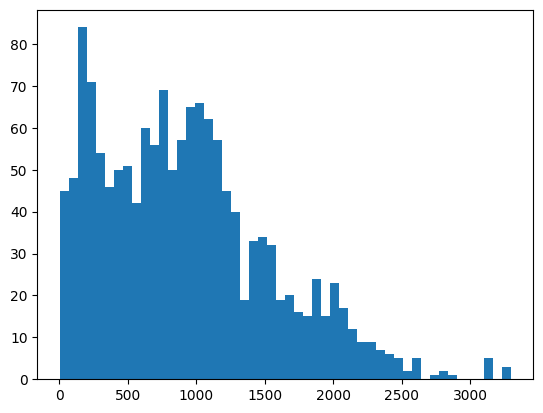

In [ ]:
import matplotlib.pyplot as plt
plt.hist(y_train,bins=50)

**Observations**
- **Y has 2 peaks**, one close to 0, one around the mean.
  - This makes Y (bike rental count) very hard to model as we can't find a distribution in the exponential family to match its pattern

### **Covariance**

<Axes: >

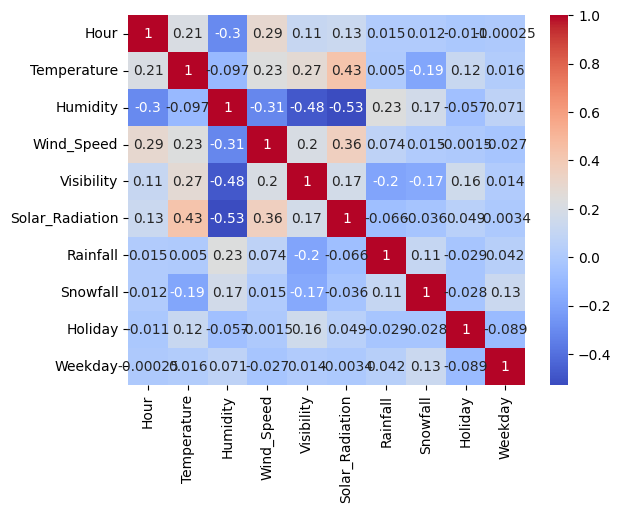

In [ ]:
import seaborn as sns

# create a correlation matrix between all the columns in your DataFrame
corr_matrix = X_train.corr()

# plot a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

### **K Means**
- Attemp to group the data and check for significant characteristics

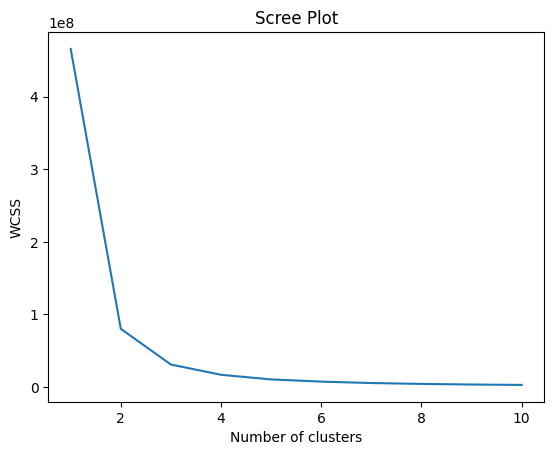

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Weekday and holiday is excluded
# calculate WCSS for each number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_train.iloc[:,:-2])
    wcss.append(kmeans.inertia_)

# plot the scree plot, ended up choosing 3 clusters
plt.plot(range(1, 11), wcss)
plt.title('Scree Plot')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

# create KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# fit the model to the data
kmeans.fit(X_train.iloc[:,:-2])

# predict the cluster assignments for each sample in the data
clusters = kmeans.predict(X_train.iloc[:,:-2])

# print the cluster centers
centers = pd.DataFrame(kmeans.cluster_centers_, columns=X_train.columns[:-2])
print(centers)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


        Hour  Temperature   Humidity  Wind_Speed   Visibility  \
0  10.241993    11.201068  63.188612    1.200712  1289.651246   
1  12.197753    15.463708  52.808989    1.669663  1950.905618   
2  10.505338    11.203203  75.341637    1.249466   564.932384   

   Solar_Radiation  Rainfall  Snowfall  
0         0.386441  0.107117  0.113879  
1         0.647011  0.012360  0.006742  
2         0.317402  0.363345  0.226690  


In [ ]:
unique_values, counts = np.unique(clusters, return_counts=True)
print("Unique values:", unique_values)
print("Counts:", counts)

Unique values: [0 1 2]
Counts: [281 890 281]


**Observations**
- From the clustering resutls, these variables represent the groups very well: ***Humidity***, ***Visibility***, ***Dew_point_temperature***, ***Rainfall***, ***Snowfall***, ***Holiday***



- Now let's look at how they correspond to bike rental

In [ ]:
pd.concat([centers, pd.DataFrame([np.mean(y_train[clusters==0]), np.mean(y_train[clusters==1]), np.mean(y_train[clusters==2])], columns=['Mean_Bike_Rental_Count']), pd.DataFrame(counts, columns=["Cluster_count"])], axis=1)

,Hour,Temperature,Humidity,Wind_Speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Mean_Bike_Rental_Count,Cluster_count
0,10.241993,11.201068,63.188612,1.200712,1289.651246,0.386441,0.107117,0.113879,791.676157,281
1,12.197753,15.463708,52.808989,1.669663,1950.905618,0.647011,0.012360,0.006742,1064.307865,890
2,10.505338,11.203203,75.341637,1.249466,564.932384,0.317402,0.363345,0.226690,629.989324,281


**Observations**
- They also corresponds to very different bike rental counts, suggests that we can group different bike rental counts with these variables
- For example, larger average solar radiation, rainfall and snowfall all corespond to larger average bike counts
- The clusters are not balanced, with the highest bike count group 3 times as large as the others.

### **PCA**

In [ ]:
# reduce the dimensionality of the data to 2 dimensions using PCA
pca = PCA(n_components=3)
data_pca = pca.fit_transform(X_train.iloc[:,:-3])
components = pca.components_

# plot the reduced data with a different color for each cluster
# plt.scatter(data_pca[:,0], data_pca[:,1], c=clusters)
# plt.title('Clustered Data (PCA)')
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.show()
pd.DataFrame(components, columns = X_train.columns[:-3])

,Hour,Temperature,Humidity,Wind_Speed,Visibility,Solar_Radiation,Rainfall,Snowfall
0,-0.001533,-0.003482,0.016402,-0.000324,-0.999858,-0.000243,0.000262,0.000170
1,0.135667,-0.017323,-0.990044,0.013995,-0.016401,0.024130,-0.007138,-0.002983
2,-0.583118,-0.808419,-0.066918,-0.030149,0.002627,-0.030270,-0.009356,0.005923


****

After consideration, we need to at least perform some transformations on Y to avoid model assumption violations. We also tried other distribution assumptions

## **Standardization**

- Linear and GLM are sensitive to non-standardized data, such data can be bad to performanceW

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into training and testing sets
X_train_sd, X_test_sd, y_train_sd, y_test_sd = train_test_split(df.drop(columns = ['Bike', 'Dew_point_temperature'], axis=1),
                                                    df['Bike'], test_size=0.25, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_sd = pd.DataFrame(scaler.fit_transform(X_train_sd), index = X_train.index, columns = X_train.columns)
X_test_sd = pd.DataFrame(scaler.fit_transform(X_test_sd), index = X_test.index, columns = X_train.columns)

X_train_sd = pd.concat([X_train_sd.drop(columns = ['Holiday', 'Weekday'], axis=1), X_train['Holiday'], X_train_sd['Weekday']], axis = 1)
X_test_sd = pd.concat([X_test_sd.drop(columns = ['Holiday', 'Weekday'], axis=1), X_test['Holiday'], X_test_sd['Weekday']], axis = 1)

In [5]:
import statsmodels.api as sm

# add a constant
X_train_sd_constant = sm.add_constant(X_train_sd) # add an intercept column to the dataset
X_test_sd_constant = sm.add_constant(X_test_sd) # add an intercept column to the dataset

## **Adding Polynomial Terms**

In [ ]:
X_poly = X_train_constant
X_poly['Hour2'] = X_poly['Hour'] ** 2
X_poly['Hour3'] = X_poly['Hour'] ** 3
X_poly['Hour4'] = X_poly['Hour'] ** 4
X_poly['Hour5'] = X_poly['Hour'] ** 5
X_poly['Hour6'] = X_poly['Hour'] ** 6
X_poly['Hour7'] = X_poly['Hour'] ** 7
X_poly['Hour8'] = X_poly['Hour'] ** 8
X_poly['Humidity2'] = X_poly['Humidity'] ** 2
X_poly['Humidity3'] = X_poly['Humidity'] ** 3
X_poly['Humidity4'] = X_poly['Humidity'] ** 4
X_poly['Weekday2'] = X_poly['Weekday'] ** 2
X_poly['Weekday3'] = X_poly['Weekday'] ** 3
X_poly['Rainfall2'] = X_poly['Rainfall'] ** 2
X_poly['Rainfall3'] = X_poly['Rainfall'] ** 3
X_poly['Snowfall2'] = X_poly['Snowfall'] ** 2
X_poly['Snowfall3'] = X_poly['Snowfall'] ** 3
X_poly['Visibility2'] = X_poly['Visibility'] ** 2
X_poly['Visibility3'] = X_poly['Visibility'] ** 3
X_poly['Temperature2'] = X_poly['Temperature'] ** 2
X_poly['Temperature3'] = X_poly['Temperature'] ** 3
X_poly['Solar_Radiation2'] = X_poly['Solar_Radiation'] ** 2
X_poly['Solar_Radiation3'] = X_poly['Solar_Radiation'] ** 3
X_poly['Wind_Speed2'] = X_poly['Wind_Speed'] ** 2
X_poly['Wind_Speed3'] = X_poly['Wind_Speed'] ** 3

In [ ]:
X_poly_test = X_test_constant
X_poly_test['Hour2'] = X_poly_test['Hour'] ** 2
X_poly_test['Hour3'] = X_poly_test['Hour'] ** 3
X_poly_test['Hour4'] = X_poly_test['Hour'] ** 4
X_poly_test['Hour5'] = X_poly_test['Hour'] ** 5
X_poly_test['Hour6'] = X_poly_test['Hour'] ** 6
X_poly_test['Hour7'] = X_poly_test['Hour'] ** 7
X_poly_test['Hour8'] = X_poly_test['Hour'] ** 8
X_poly_test['Humidity2'] = X_poly_test['Humidity'] ** 2
X_poly_test['Humidity3'] = X_poly_test['Humidity'] ** 3
X_poly_test['Humidity4'] = X_poly_test['Humidity'] ** 4
X_poly_test['Weekday2'] = X_poly_test['Weekday'] ** 2
X_poly_test['Weekday3'] = X_poly_test['Weekday'] ** 3
X_poly_test['Rainfall2'] = X_poly_test['Rainfall'] ** 2
X_poly_test['Rainfall3'] = X_poly_test['Rainfall'] ** 3
X_poly_test['Snowfall2'] = X_poly_test['Snowfall'] ** 2
X_poly_test['Snowfall3'] = X_poly_test['Snowfall'] ** 3
X_poly_test['Visibility2'] = X_poly_test['Visibility'] ** 2
X_poly_test['Visibility3'] = X_poly_test['Visibility'] ** 3
X_poly_test['Temperature2'] = X_poly_test['Temperature'] ** 2
X_poly_test['Temperature3'] = X_poly_test['Temperature'] ** 3
X_poly_test['Solar_Radiation2'] = X_poly_test['Solar_Radiation'] ** 2
X_poly_test['Solar_Radiation3'] = X_poly_test['Solar_Radiation'] ** 3
X_poly_test['Wind_Speed2'] = X_poly_test['Wind_Speed'] ** 2
X_poly_test['Wind_Speed3'] = X_poly_test['Wind_Speed'] ** 3

## **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# fit a linear regression model using sklearn
model = LinearRegression().fit(X_train_constant, y_train)

# create a summary table using statsmodels
est = sm.OLS(y_train, X_train_constant).fit() # fit a linear regression model using statsmodels
summary = est.summary() # create a summary table

# print the summary table
print(summary)

                            OLS Regression Results                            
Dep. Variable:                   Bike   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     157.0
Date:                Mon, 01 May 2023   Prob (F-statistic):          2.36e-222
Time:                        18:47:35   Log-Likelihood:                -10872.
No. Observations:                1452   AIC:                         2.177e+04
Df Residuals:                    1441   BIC:                         2.183e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             973.3612     88.750     

**Observations**
- The model has a low $R^2$

### **Diagnostics**

#### **Residuals**

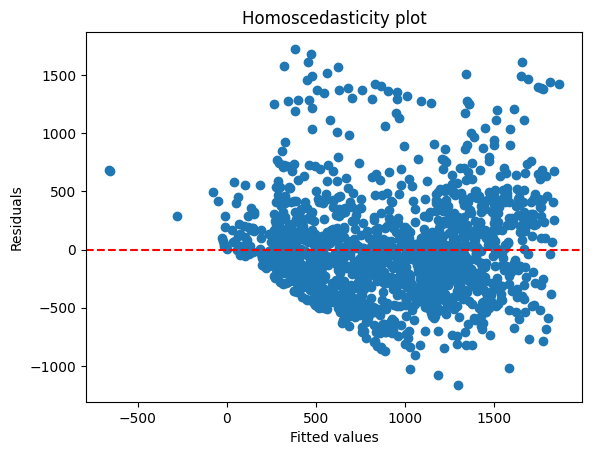

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# calculate the predicted y values
y_pred = model.predict(X_train_constant)

# calculate residuals
residuals = y_train - y_pred

# plot residuals vs fitted values
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Homoscedasticity plot')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

**Observations**
- $y = -x$ line
  - Model cannot predict small values for bike rentals
  - Below shows that most below 100 values are predicted very large

In [ ]:
# Checking predictions of bike rental < 100
y_pred[y_train<100]

array([ 564.07497704,  247.59866797,  -59.33683129,  549.36647093,
        206.93764312,  503.70933156,  206.28438831,   97.04709818,
        312.40562862,  768.53770772,  424.26050846,  416.01531667,
        662.91770504,  131.8245262 ,  341.8125552 ,   -4.40220595,
       1034.41943655,  437.9318584 ,   -2.91510855,  331.06827672,
        -14.06649702,  892.56474803,  831.89076681,  381.79727749,
       -656.23204777,  644.46693675,  506.36076462,  524.48216046,
        301.2302147 ,  508.07529762, -653.09314492,  399.84408212,
        224.24941195,  857.22753467,  680.28927053,  478.17105231,
        460.98585794,  493.37275235,  -24.03125357,  266.72455333,
        536.83853505,  642.96227624,  856.94127133,  475.5505886 ,
        557.75780863,  215.79313745,  -16.07759289,  825.19683769,
        821.29080201,  296.97433702,  391.98872616,  775.74082679,
        413.153966  , -280.39996481,  259.40718372,   35.40466961,
         68.80835692,  775.52733772,  643.87420198,  756.32775

#### **Outliers, Standardized Residuals, VIF, Normality**

**Check predictors vs. response**

In [ ]:
import matplotlib.pyplot as plt
# Bike counts vs. Predictors
# Plot residuals against predictor variable
for col in X_train.columns:
  plt.scatter(list(X_train_constant[col]), list(y_train))
  plt.xlabel(col)
  plt.ylabel('Bike count')
  plt.show()

**Check predictors vs. residuals**

In [ ]:
# Residuals vs. Predictors
# Plot residuals against predictor variable
for col in X_train.columns:
  plt.scatter(list(X_train_constant[col]), list(residuals))
  plt.xlabel(col)
  plt.ylabel('Residuals')
  plt.show()

#### **Predictions**

- The **MSE** on testing data is about 167000

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test_constant)
# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)

Mean squared error:  168710.6826132982


- For bike rental counts less than 50, the model is very bad at predicting. (Large residuals)

In [ ]:
y_pred[y_test<50]

array([-116.36164286, -441.19799775,  618.80842226,  230.41557205,
        351.60181371,  220.55393421,  -84.97241528,  280.65952735,
       1679.4587995 ,  172.55386286])

### **Conclusion**
**Linear models is not sufficient as we have strictly non-negative y values**

## **Linear Regression with Standardized Data**

- Below the linear regression is performed on standardized data. $R^2$ and AIC/BIC, Log-likelihood and all the fit statistics shouldn't change.

In [ ]:
# fit a linear regression model using sklearn
model = LinearRegression().fit(X_train_sd_constant, y_train)

# create a summary table using statsmodels
est = sm.OLS(y_train, X_train_sd_constant).fit() # fit a linear regression model using statsmodels
summary = est.summary() # create a summary table

print(summary)

                            OLS Regression Results                            
Dep. Variable:                   Bike   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     157.0
Date:                Sun, 23 Apr 2023   Prob (F-statistic):          2.36e-222
Time:                        21:00:50   Log-Likelihood:                -10872.
No. Observations:                1452   AIC:                         2.177e+04
Df Residuals:                    1441   BIC:                         2.183e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             937.5805     11.689     

#### **Predictions**

- The **MSE** on testing data is about 169692, which is worse than non-standardized data

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test_sd_constant)
# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)

Mean squared error:  169388.90195910347


## **Penalized Linear Regression (Standardized Data)**

**Attempt to run penalized regression to counter non-linearity**

In [ ]:
from sklearn.linear_model import ElasticNet

# assuming X_train and y_train are your predictor and response variables for the training set
# alpha and l1_ratio are hyperparameters controlling the strength of L1 and L2 regularization
# alpha=0 corresponds to no regularization
# l1_ratio=0 corresponds to pure L2 regularization
# l1_ratio=1 corresponds to pure L1 regularization
model = ElasticNet(alpha=0.1, l1_ratio=0.9)
model.fit(X_train_sd_constant, y_train)

ElasticNet(alpha=0.1, l1_ratio=0.9)

### **Prediction**

- **MSE** if not so different from linear regression

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test_sd_constant)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

from sklearn.metrics import r2_score

y_pred = model.predict(X_test_sd_constant)
r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)

MSE: 169386.25143764747
R2 score: 0.5296481141529321


## **Log-transformation of Y**

- Since Y is strictly non-negative, we might want to perform a log-transformation on Y

****

## **GLM**

- To better fit the non-negative response data, we can try GLM which assumes different distributions for Y. 

### **Poisson vs. Negative Binomial**


- Both Poisson and Negative Binomial distribution are non-negative. Poisson assumes mean=variance, so in this case Negative Binomial seems to be more suitable

In [ ]:
import numpy as np

In [ ]:
# briefly check mean and variance
print('mean', np.mean(y_train), 'variance', np.var(y_train))

mean 932.3066494512589 variance 386103.7813696001


- mean and variance are very different

In [ ]:
import statsmodels.api as sm
import numpy as np

# assume y is your count response variable and X is your predictor variables
# fit a Poisson regression model
poisson_model = sm.GLM(y_train, X_train_constant, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

# calculate dispersion statistic for Poisson model
poisson_dispersion = poisson_results.deviance / poisson_results.df_resid

# fit a negative binomial regression model
negbin_model = sm.GLM(y_train, X_train_constant, family=sm.families.NegativeBinomial())
negbin_results = negbin_model.fit()

# calculate dispersion statistic for negative binomial model
negbin_dispersion = negbin_results.deviance / negbin_results.df_resid

print(poisson_dispersion,negbin_dispersion)

196.53310644402495 0.3765866578327057


In [ ]:
poisson_results.summary()

In [ ]:
negbin_results.summary()

**Observations**
- Negative binomial is a more appropriate model, but it performs poorly due to Pseudo $R^2$
- Need to perform variable selection, and add polynomials to tune performance

### **Fit a polynomial for Negative-Binomial Model (Raw data performs better than standardized)**

In [ ]:
# fit a negative binomial regression model
negbin_model = sm.GLM(y_train, X_poly, family=sm.families.NegativeBinomial())
negbin_results = negbin_model.fit()

# calculate dispersion statistic for negative binomial model
negbin_dispersion = negbin_results.deviance / negbin_results.df_resid
negbin_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   Bike   No. Observations:                 1452
Model:                            GLM   Df Residuals:                     1417
Model Family:        NegativeBinomial   Df Model:                           34
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11036.
Date:                Sun, 23 Apr 2023   Deviance:                       285.09
Time:                        22:52:53   Pearson chi2:                     264.
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3722
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.8491      1.289      2.985      0.003       1.322       6.376
Hour                 1.2213      0.316      3.867      0.000       0.602       1.840
Temperature         -0.0056      0.034     -0.163      0.871      -0.073       0.062
Humidity             0.2195      0.099      2.213      0.027       0.025       0.414
Wind_Speed          -0.1762      0.188     -0.936      0.349      -0.545       0.193
Visibility           0.0009      0.001      0.887      0.375      -0.001       0.003
Solar_Radiation     -0.1409      0.388     -0.364      0.716      -0.901       0.619
Rainfall            -0.7986      0.168     -4.749      0.000      -1.128      -0.469
Snowfall            -0.0746      0.343     -0.218      0.828      -0.746       0.597
Holiday             -0.2618      0.130     -2.012      0.044      -0.517      -0.007
Weekday              0.2794      0.208      1.346      0.178      -0.127       0.686
Hour2               -1.5375      0.240     -6.405      0.000      -2.008      -1.067
Hour3                0.5355      0.076      7.033      0.000       0.386       0.685
Hour4               -0.0855      0.012     -6.929      0.000      -0.110      -0.061
Hour5                0.0073      0.001      6.565      0.000       0.005       0.009
Hour6               -0.0003   5.59e-05     -6.121      0.000      -0.000      -0.000
Hour7              8.39e-06   1.48e-06      5.671      0.000    5.49e-06    1.13e-05
Hour8            -8.395e-08    1.6e-08     -5.246      0.000   -1.15e-07   -5.26e-08
Humidity2           -0.0075      0.003     -2.608      0.009      -0.013      -0.002
Humidity3            0.0001   3.51e-05      2.974      0.003    3.55e-05       0.000
Humidity4        -5.077e-07   1.51e-07     -3.354      0.001   -8.04e-07   -2.11e-07
Weekday2            -0.0830      0.059     -1.398      0.162      -0.199       0.033
Weekday3             0.0065      0.005      1.317      0.188      -0.003       0.016
Rainfall2            0.1039      0.035      2.964      0.003       0.035       0.173
Rainfall3           -0.0038      0.002     -2.510      0.012      -0.007      -0.001
Snowfall2            0.0137      0.133      0.103      0.918      -0.247       0.274
Snowfall3           -0.0010      0.011     -0.089      0.929      -0.023       0.021
Visibility2      -7.299e-07   9.43e-07     -0.774      0.439   -2.58e-06    1.12e-06
Visibility3       1.777e-10    2.6e-10      0.683      0.495   -3.32e-10    6.88e-10
Temperature2         0.0038      0.003      1.411      0.158      -0.001       0.009
Temperature3     -9.843e-05   6.26e-05     -1.573      0.116      -0.000    2.42e-05
Solar_Radiation2     0.1209      0.307      0.394      0.694      -0.481       0.722
Solar_Radiation3    -0.0147      0.072     -0.203      0.839      -0.156       0.127
Wind_Speed2          0.

### **Variable selection for the polynomial Negative-Binomial Model**

#### **Backward Selection**

In [ ]:
# backward elimination based on p-values
X_poly_copy = X_poly
nb_model = sm.GLM(y_train, X_poly_copy, family=sm.families.NegativeBinomial()).fit()

while nb_model.pvalues.max() > 0.05:
    max_pvalue = nb_model.pvalues.idxmax()
    X_poly_copy = X_poly_copy.drop(max_pvalue, axis=1)
    nb_model = sm.GLM(y_train, X_poly_copy, family=sm.families.NegativeBinomial()).fit()

# final model
nb_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   Bike   No. Observations:                 1452
Model:                            GLM   Df Residuals:                     1433
Model Family:        NegativeBinomial   Df Model:                           18
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11041.
Date:                Wed, 26 Apr 2023   Deviance:                       296.76
Time:                        00:58:03   Pearson chi2:                     277.
No. Iterations:                    17   Pseudo R-squ. (CS):             0.3671
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.1444      1.170      3.544      0.000       1.852       6.437
Hour             1.1611      0.309      3.758      0.000       0.556       1.767
Humidity         0.2330      0.096      2.429      0.015       0.045       0.421
Rainfall        -0.8026      0.161     -4.974      0.000      -1.119      -0.486
Hour2           -1.4731      0.232     -6.353      0.000      -1.927      -1.019
Hour3            0.5134      0.073      7.026      0.000       0.370       0.657
Hour4           -0.0819      0.012     -6.936      0.000      -0.105      -0.059
Hour5            0.0070      0.001      6.566      0.000       0.005       0.009
Hour6           -0.0003   5.37e-05     -6.109      0.000      -0.000      -0.000
Hour7         8.045e-06   1.43e-06      5.645      0.000    5.25e-06    1.08e-05
Hour8        -8.062e-08   1.55e-08     -5.209      0.000   -1.11e-07   -5.03e-08
Humidity2       -0.0079      0.003     -2.845      0.004      -0.013      -0.002
Humidity3        0.0001   3.38e-05      3.212      0.001    4.23e-05       0.000
Humidity4    -5.233e-07   1.46e-07     -3.588      0.000   -8.09e-07   -2.37e-07
Weekday2        -0.0033      0.002     -2.051      0.040      -0.006      -0.000
Rainfall2        0.1026      0.034      3.046      0.002       0.037       0.169
Rainfall3       -0.0037      0.001     -2.557      0.011      -0.007      -0.001
Temperature2     0.0031      0.001      4.349      0.000       0.002       0.004
Temperature3 -7.761e-05   2.65e-05     -2.926      0.003      -0.000   -2.56e-05
================================================================================
"""

**Observations**
- We ended up with some 2nd order and 3rd order terms

In [ ]:
X_poly_vs = X_poly[['const','Hour','Humidity','Rainfall','Hour2','Hour3', 'Hour4', 'Hour5', 'Hour6', 'Hour7', 'Hour8', 
                    'Humidity2', 'Humidity3', 'Humidity4','Weekday2','Rainfall2','Rainfall3','Temperature2','Temperature3']]

### **Diagnostics**

1507   -121.222519
1899     79.883504
1187   -151.859629
1509     75.984343
1775    193.768566
           ...    
1130   -727.315618
1294    310.456908
860    -693.189037
1459   -163.784470
1126    334.453916
Length: 1452, dtype: float64


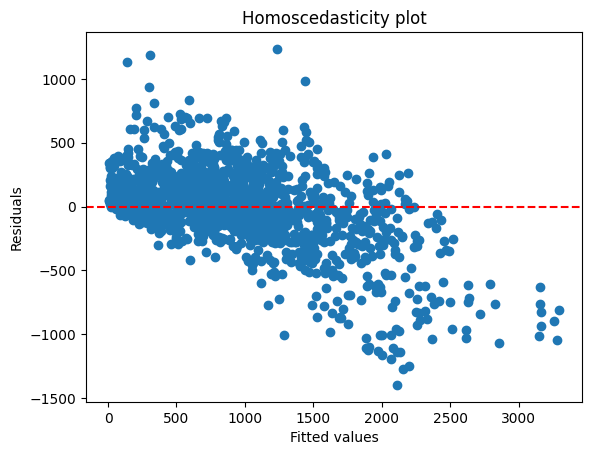

In [ ]:
# predict and get mse
negbin_pred = nb_model.predict(X_poly_vs)
negbin_res = negbin_pred - y_train
print(negbin_res)
# plot residuals vs fitted values
plt.scatter(y_train, negbin_res)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Homoscedasticity plot')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

### **Prediction**

#### Use the final selection of the polynomials to run the negative binomial model

In [ ]:
X_poly_test_vs = X_poly_test[['const','Hour','Humidity','Rainfall','Hour2','Hour3', 'Hour4', 'Hour5', 'Hour6', 'Hour7', 'Hour8', 
                    'Humidity2', 'Humidity3', 'Humidity4','Weekday2','Rainfall2','Rainfall3','Temperature2','Temperature3']]

#### **MSE**
- The **MSE** is about 97500, which is much better than Linear Regression
- The $y = -x$ line for neg-binomial model is not as obvious

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

negbin_pred = nb_model.predict(X_poly_test_vs)
print("Testing Mean squared error for Negative-Binomial model: ", mean_squared_error(y_test, negbin_pred), "\n MAE is", mean_absolute_error(y_test, negbin_pred))

Testing Mean squared error for Negative-Binomial model:  97571.58718880176 
 MAE is 220.0561372539406


**Illustration of random sample**
- 15 samples were chosen from the testing data, their predictions are compared with the true values

In [ ]:
import numpy as np
# Illustration on testing data
# randomly select 15 rows from the testing data
indices = np.random.choice(len(X_poly_test_vs), 30, replace=False)
X_poly_test_vs_sample = X_poly_test_vs.iloc[indices]
y_test_sample = y_test.iloc[indices]

# predict using the RF model
y_pred_sample = nb_model.predict(X_poly_test_vs_sample)

# concatenate the predicted and true values with the predictors in a dataframe
X_poly_test_vs_sample = X_test.iloc[indices]
df_sample = pd.concat([X_poly_test_vs_sample.reset_index(drop=True),
                       pd.Series(y_test_sample).reset_index(drop=True),
                       pd.Series(y_pred_sample).reset_index(drop=True)], axis=1)
df_sample.columns = list(X_poly_test_vs_sample.columns) + ['True', 'Pred']
df_sample

,Hour,Temperature,Humidity,Wind_Speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Holiday,Weekday,True,Pred
0,19,5.2,48,1.9,1590,0.00,0.0,0.0,0,4,1026,1128.377875
1,13,18.3,33,1.9,1324,2.53,0.0,0.0,0,6,1652,993.146287
2,19,11.3,50,1.1,2000,0.00,0.0,0.0,0,3,1723,1402.096705
3,14,23.7,28,1.4,2000,2.77,0.0,0.0,1,2,1522,1428.264361
4,7,16.5,97,2.3,364,0.00,9.5,0.0,0,6,5,47.247274
5,7,-1.0,43,1.8,2000,0.00,0.0,0.0,0,4,848,631.763717
6,11,4.3,25,2.0,1958,1.56,0.0,0.0,0,5,635,764.470862
7,3,1.7,59,0.5,2000,0.00,0.0,0.0,0,2,182,178.791554
8,18,20.9,77,0.6,2000,0.23,0.0,0.0,0,5,2235,1900.202307
9,17,18.8,24,2.1,2000,0.63,0.0,0.0,0,7,1883,1910.949353


**Observations**
- We observed that the predictions are a little bit off, but for larger values it is able to capture most of them. However, it fails to predict smaller values accurately

****

### **Standardized**

#### **Backward Selection**

In [ ]:
X_poly_sd = X_train_sd_constant
X_poly_sd['Hour2'] = X_poly_sd['Hour'] ** 2
X_poly_sd['Hour3'] = X_poly_sd['Hour'] ** 3
X_poly_sd['Weekday2'] = X_poly_sd['Weekday'] ** 2
X_poly_sd['Weekday3'] = X_poly_sd['Weekday'] ** 3
X_poly_sd['Rainfall2'] = X_poly_sd['Rainfall'] ** 2
X_poly_sd['Rainfall3'] = X_poly_sd['Rainfall'] ** 3
X_poly_sd['Snowfall2'] = X_poly_sd['Snowfall'] ** 2
X_poly_sd['Snowfall3'] = X_poly_sd['Snowfall'] ** 3
X_poly_sd['Visibility2'] = X_poly_sd['Visibility'] ** 2
X_poly_sd['Visibility3'] = X_poly_sd['Visibility'] ** 3
X_poly_sd['Temperature2'] = X_poly_sd['Temperature'] ** 2
X_poly_sd['Temperature3'] = X_poly_sd['Temperature'] ** 3
X_poly_sd['Solar_Radiation2'] = X_poly_sd['Solar_Radiation'] ** 2
X_poly_sd['Solar_Radiation3'] = X_poly_sd['Solar_Radiation'] ** 3
X_poly_sd['Wind_Speed2'] = X_poly_sd['Wind_Speed'] ** 2
X_poly_sd['Wind_Speed3'] = X_poly_sd['Wind_Speed'] ** 3

In [ ]:
X_poly_sd

In [ ]:
# backward elimination based on p-values
X_poly_sd_copy = X_poly_sd
nb_model = sm.GLM(y_train, X_poly_sd_copy, family=sm.families.NegativeBinomial()).fit()

while nb_model.pvalues.max() > 0.05:
    max_pvalue = nb_model.pvalues.idxmax()
    X_poly_sd_copy = X_poly_sd_copy.drop(max_pvalue, axis=1)
    nb_model = sm.GLM(y_train, X_poly_sd_copy, family=sm.families.NegativeBinomial()).fit()

# final model
nb_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   Bike   No. Observations:                 1549
Model:                            GLM   Df Residuals:                     1535
Model Family:        NegativeBinomial   Df Model:                           13
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11887.
Date:                Fri, 21 Apr 2023   Deviance:                       498.22
Time:                        02:48:12   Pearson chi2:                     475.
No. Iterations:                    14   Pseudo R-squ. (CS):             0.2797
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.8889      0.062    111.032      0.000       6.767       7.011
Hour                 0.7166      0.079      9.063      0.000       0.562       0.872
Temperature          0.1530      0.032      4.833      0.000       0.091       0.215
Humidity            -0.0793      0.040     -1.971      0.049      -0.158      -0.000
Rainfall            -0.8853      0.111     -7.951      0.000      -1.104      -0.667
Snowfall            -0.0711      0.027     -2.587      0.010      -0.125      -0.017
Weekday             -0.0632      0.026     -2.453      0.014      -0.114      -0.013
Hour2               -0.1294      0.032     -4.006      0.000      -0.193      -0.066
Hour3               -0.2104      0.037     -5.678      0.000      -0.283      -0.138
Rainfall2            0.0974      0.019      5.129      0.000       0.060       0.135
Rainfall3           -0.0028      0.001     -4.407      0.000      -0.004      -0.002
Visibility3          0.0232      0.011      2.203      0.028       0.003       0.044
Solar_Radiation2    -0.2192      0.088     -2.482      0.013      -0.392      -0.046
Solar_Radiation3     0.0672      0.032      2.112      0.035       0.005       0.130
====================================================================================
"""

**Observations**
- We ended up with some 2nd order and 3rd order terms

In [ ]:
X_poly_sd_vs = X_poly_sd[['const','Hour','Temperature','Humidity','Rainfall','Snowfall','Weekday','Hour2','Hour3','Rainfall2','Rainfall3','Visibility3','Solar_Radiation2','Solar_Radiation3']]

### **Prediction**

#### Use the final selection of the polynomials to run the negative binomial model (standardized)

In [ ]:
X_poly_sd_test = X_test_sd_constant
X_poly_sd_test['Hour2'] = X_poly_sd_test['Hour'] ** 2
X_poly_sd_test['Hour3'] = X_poly_sd_test['Hour'] ** 3
X_poly_sd_test['Weekday2'] = X_poly_sd_test['Weekday'] ** 2
X_poly_sd_test['Weekday3'] = X_poly_sd_test['Weekday'] ** 3
X_poly_sd_test['Rainfall2'] = X_poly_sd_test['Rainfall'] ** 2
X_poly_sd_test['Rainfall3'] = X_poly_sd_test['Rainfall'] ** 3
X_poly_sd_test['Snowfall2'] = X_poly_sd_test['Snowfall'] ** 2
X_poly_sd_test['Snowfall3'] = X_poly_sd_test['Snowfall'] ** 3
X_poly_sd_test['Visibility2'] = X_poly_sd_test['Visibility'] ** 2
X_poly_sd_test['Visibility3'] = X_poly_sd_test['Visibility'] ** 3
X_poly_sd_test['Temperature2'] = X_poly_sd_test['Temperature'] ** 2
X_poly_sd_test['Temperature3'] = X_poly_sd_test['Temperature'] ** 3
X_poly_sd_test['Solar_Radiation2'] = X_poly_sd_test['Solar_Radiation'] ** 2
X_poly_sd_test['Solar_Radiation3'] = X_poly_sd_test['Solar_Radiation'] ** 3
X_poly_sd_test['Wind_Speed2'] = X_poly_sd_test['Wind_Speed'] ** 2
X_poly_sd_test['Wind_Speed3'] = X_poly_sd_test['Wind_Speed'] ** 3

In [ ]:
X_poly_sd_test_vs = X_poly_sd_test[['const','Hour','Temperature','Humidity','Rainfall','Snowfall','Weekday','Hour2','Hour3','Rainfall2','Rainfall3','Visibility3','Solar_Radiation2','Solar_Radiation3']]

#### **MSE**
- The **MSE** is about 141000, which is worse than non-standardized

In [ ]:
negbin_pred = nb_model.predict(X_poly_sd_test_vs)
print("Testing Mean squared error for Negative-Binomial model: ", mean_squared_error(y_test, negbin_pred))

Testing Mean squared error for Negative-Binomial model:  141615.502392477


****

## **Kernel-ridge regression (Polynomial)**

- Fit a Kernel ridge regression on the polynomials(standardized) we just obtained, in order to counter non-linearity

In [ ]:
from sklearn.kernel_ridge import KernelRidge

In [ ]:
# Fit kernel ridge regression model with Gaussian kernel
model = KernelRidge(kernel='rbf', alpha=0.1, gamma=0.2)
model.fit(X_poly_sd, y_train)

# Make predictions on new data
y_pred = model.predict(X_poly_sd)

### **Diagnostics**

- The residual plot is not explanable

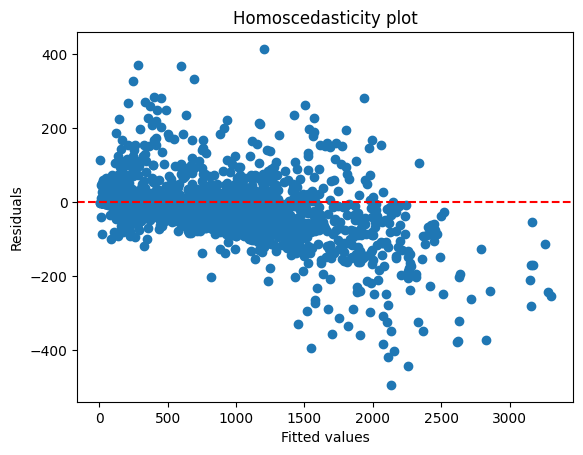

In [ ]:
# plot residuals vs fitted values
kernel_res = y_pred - y_train
plt.scatter(y_train, kernel_res)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Homoscedasticity plot')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

### **Prediction**
- The best

In [ ]:
for a in range(0, 20, 2):
  alpha = a / 100
  model = KernelRidge(kernel='rbf', alpha=alpha, gamma=0.2)
  model.fit(X_poly_sd, y_train)
  y_pred = model.predict(X_poly_sd)
  print(f"Training Mean squared error for Kernel_ridge regression model: {alpha}", mean_squared_error(y_train, y_pred))

  # Make predictions on new data
  y_pred = model.predict(X_poly_sd_test)
  print(f"Testing Mean squared error for Kernel_ridge regression model: {alpha}", mean_squared_error(y_test, y_pred))
  print("")

Training Mean squared error for Kernel_ridge regression model: 0.0 5.2244648526420627e-20
Testing Mean squared error for Kernel_ridge regression model: 0.0 191296.34638756138

Training Mean squared error for Kernel_ridge regression model: 0.02 1408.3430164308354
Testing Mean squared error for Kernel_ridge regression model: 0.02 184078.51759908634

Training Mean squared error for Kernel_ridge regression model: 0.04 3067.064025133331
Testing Mean squared error for Kernel_ridge regression model: 0.04 184858.8094919712

Training Mean squared error for Kernel_ridge regression model: 0.06 4757.948278705601
Testing Mean squared error for Kernel_ridge regression model: 0.06 186018.1011239312

Training Mean squared error for Kernel_ridge regression model: 0.08 6467.754558616823
Testing Mean squared error for Kernel_ridge regression model: 0.08 187269.34346124408

Training Mean squared error for Kernel_ridge regression model: 0.1 8194.457701838202
Testing Mean squared error for Kernel_ridge regr

**Observations**

- After standardization, Kernel Ridge regression performs worse than raw regression or GLM
- Kernel ridge regression has a acceptable trainng error but large testing error, which is a sign of over-fitting

### **Kernel Regression**

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import rbf_kernel

class RBFKernelRegression:
    def __init__(self, gamma=1.0):
        self.gamma = gamma
        self.X_train = None
        self.y_train = None
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        K = rbf_kernel(X, self.X_train, gamma=self.gamma)
        y_pred = K.dot(self.y_train) / K.sum(axis=1)
        return y_pred

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Initialize RBFKernelRegression with gamma=0.1
rbf_kernel_reg = RBFKernelRegression(gamma=0.01)

# Fit the model on the training data
rbf_kernel_reg.fit(X_poly, y_train)

# Make predictions on the test data
y_pred = rbf_kernel_reg.predict(X_poly_test)

# Calculate root mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

## **SVM (Polynomial+Standardized)**

- SVM with the right choice of Kernel can also model non-linear relationship between predictors and irregular response variables


In [ ]:
from sklearn.svm import SVR

### **Linear Kernels**

- Using linear kernels, we tune the SVM model by applying different values of Cs

In [ ]:
# DONT RUN THIS
for i in range(105,500,10):
  C = i / 10
  # create an SVM regression model
  model = SVR(kernel='linear', C=C)

  # fit the model on the training data
  model.fit(X_poly_sd, y_train)
  # predict on the testing data
  y_pred = model.predict(X_poly_sd_test)

  # calculate the mean squared error
  mse = mean_squared_error(y_test, y_pred)
  print(f"Mean squared error for C = {C}: ", mse)

Mean squared error for C = 10.5:  151546.07676759647
Mean squared error for C = 11.5:  151404.50408821373
Mean squared error for C = 12.5:  151062.77542913065
Mean squared error for C = 13.5:  151182.9394772416
Mean squared error for C = 14.5:  151108.01989262376
Mean squared error for C = 15.5:  150911.54161834263
Mean squared error for C = 16.5:  150785.88606923365
Mean squared error for C = 17.5:  150821.164154891
Mean squared error for C = 18.5:  150859.44040231034
Mean squared error for C = 19.5:  150757.17077505478
Mean squared error for C = 20.5:  150620.48799804944
Mean squared error for C = 21.5:  150715.50174455307
Mean squared error for C = 22.5:  150651.7017413935
Mean squared error for C = 23.5:  150865.51259440908
Mean squared error for C = 24.5:  150936.53471897217
Mean squared error for C = 25.5:  150836.42655411366
Mean squared error for C = 26.5:  150825.94203095298
Mean squared error for C = 27.5:  150871.0907474298
Mean squared error for C = 28.5:  150861.474801584


#### **Prediction**

In [ ]:
from sklearn.metrics import mean_squared_error
# The best is 20.5
model = SVR(kernel='linear', C=20.5)

# fit the model on the training data
model.fit(X_poly_sd, y_train)
# predict on the testing data
y_pred = model.predict(X_poly_sd_test)

In [ ]:
# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error for C = {20.5}: ", mse)

Mean squared error for C = 20.5:  150620.48799804944


**Observations**
- SVM regression with **Linear** kernel is better than linear regression, but worse than GLM

### **Non-linear Kernels**

In [ ]:
# Fit regression model with polynomial kernel
clf_poly = SVR(kernel='poly', degree=3, C=20.5, gamma='auto')
clf_poly.fit(X_poly_sd, y_train)

# predict on the testing data
y_pred = clf_poly.predict(X_poly_sd_test)

# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error for C = {20.5}: ", mse)

In [ ]:
# Fit regression model with RBF kernel
clf_rbf = SVR(kernel='rbf', C=20.5, gamma=0.1)
clf_rbf.fit(X_poly_sd, y_train)

# predict on the testing data
y_pred = clf_rbf.predict(X_poly_sd_test)

# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error for C = {20.5}: ", mse)

In [ ]:
# Fit regression model with sigmoid kernel
clf_sigmoid = SVR(kernel='sigmoid', C=20.5, gamma=0.1)
clf_sigmoid.fit(X_poly_sd, y_train)

# predict on the testing data
y_pred = clf_sigmoid.predict(X_poly_sd_test)

# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error for C = {20.5}: ", mse)

## **Other models**

### **Random Forest**

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Define the range of n_estimators to test
n_estimators_range = range(500, 701, 50)

# Perform 10-fold cross-validation for each value of n_estimators
for n in [150, 250, 400, 500, 600,700]:
    # Initialize the random forest model
    rf = RandomForestRegressor(n_estimators=n, random_state=42)

    # Compute 10-fold cross-validation scores
    cv_scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

    # Convert negative MSE scores to positive
    cv_scores = -1 * cv_scores

    # Calculate the mean and standard deviation of the CV scores
    mean_cv_mse = cv_scores.mean()
    std_cv_mse = cv_scores.std()

    # Print the CV scores, C=150 is the best
    print(f"CV Mean squared error for estimators = {n}: {mean_cv_mse:.4f} (+/- {std_cv_mse:.4f})")

CV Mean squared error for estimators = 150: 42101.9760 (+/- 12835.8109)
CV Mean squared error for estimators = 250: 41451.2122 (+/- 12092.9814)
CV Mean squared error for estimators = 400: 41697.4812 (+/- 12675.6290)
CV Mean squared error for estimators = 500: 41438.1686 (+/- 12726.8713)
CV Mean squared error for estimators = 600: 41309.4915 (+/- 12754.4669)
CV Mean squared error for estimators = 700: 41421.9980 (+/- 12771.9320)


In [ ]:
import pandas as pd

# create data
grid_search = {
        'No. Decision Trees': [150, 250, 400, 500, 600,700],
        'Testing MSE': [50000, 60000, 75000, 80000]}

# create dataframe
df = pd.DataFrame(data)

# format salary column
df['Salary'] = df['Salary'].map('${:,.2f}'.format)

# print table
print(df.to_string(index=False))


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

rf = RandomForestRegressor(n_estimators=600, random_state=42)
rf.fit(X_train, y_train)
# Calculate the MSE for testing data
mse = mean_squared_error(y_test, rf.predict(X_test))
mae = mean_absolute_error(y_test, rf.predict(X_test))

# Calculate the R^2 score of the random forest model
r2_rf = r2_score(y_train, rf.predict(X_train))
r2_rf

print(f'Mean squared error for testing data at C = {600} is', mse, '\n MAE is', mae, '\nR2 is', r2_rf)

Mean squared error for testing data at C = 600 is 43594.49111156358 
 MAE is 132.56296563573883 
R2 is 0.9862062457596759


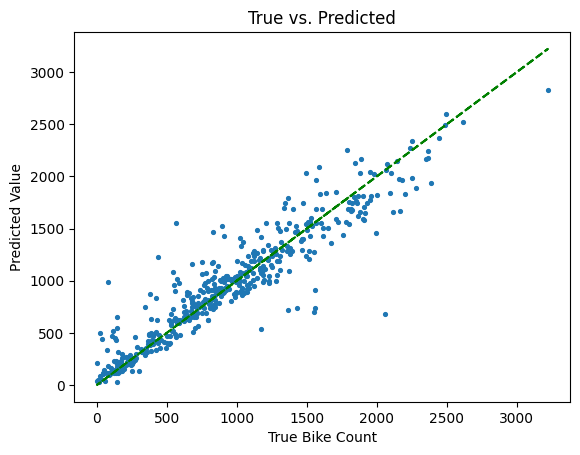

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# create scatter plot
plt.scatter(y_test, rf.predict(X_test), s=7.5)

# plot 45-degree line
plt.plot(y_test, y_test, '--', color='green')

# set axis labels and title
plt.xlabel('True Bike Count')
plt.ylabel('Predicted Value')
plt.title('True vs. Predicted')

# display plot
plt.show()

In [ ]:
mean_squared_error(y_train, rf.predict(X_train))

5384.317137125038

In [ ]:
import numpy as np
np.sqrt(43594.49111156358)

208.79293836613243

In [ ]:
rf.score(X_train,y_train)

0.8766985011199582

- Random forest beats other models by a large margin. It has a testing MSE of 37826, and an $R^2$ of 0.88.
- The n_estimators parameter controls the complexity of the model and can have a significant impact on the performance of the model. A larger value of n_estimators can increase the accuracy of the model, but it also increases the computational cost and the risk of overfitting the training data.

**Model Inspection**

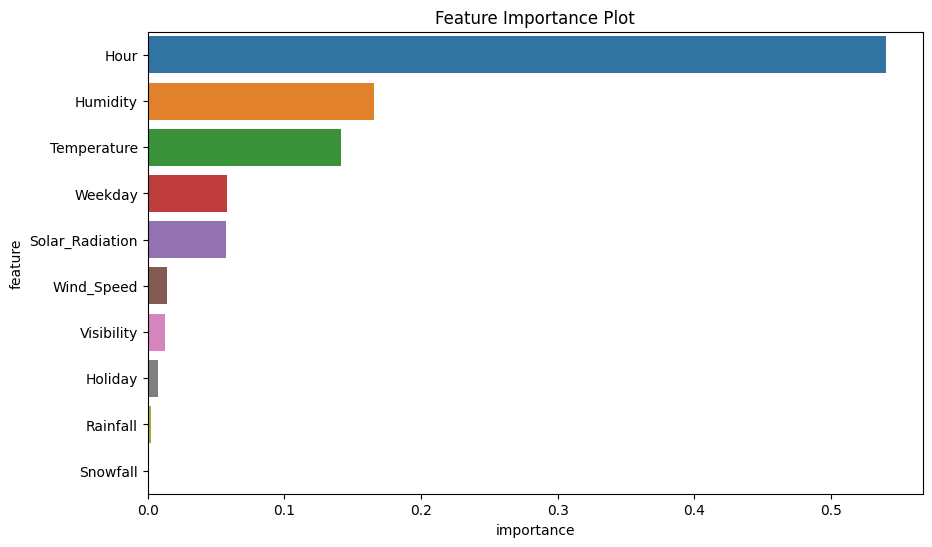

In [ ]:
importance_scores = rf.feature_importances_
feature_names = X_train.columns.tolist()

# Create a dataframe of feature names and their importance scores
feature_importance = pd.DataFrame({'feature': feature_names, 'importance': importance_scores})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importances
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance Plot')
plt.show()

In [ ]:
X_train

,Hour,Temperature,Humidity,Wind_Speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Holiday,Weekday
1507,19,9.8,45,1.3,1882,0.00,0.0,0.0,0,2
1899,14,6.0,27,0.6,1452,0.34,0.0,0.0,0,4
1187,2,9.5,58,3.0,2000,0.00,0.0,0.0,0,6
1509,20,9.5,44,1.8,1991,0.00,0.0,0.0,0,2
1775,22,2.7,85,1.1,580,0.00,0.0,3.2,0,6
...,...,...,...,...,...,...,...,...,...,...
1130,7,7.3,85,1.4,1039,0.00,0.0,0.0,0,4
1294,16,14.7,32,2.0,1934,1.13,0.0,0.0,0,4
860,14,18.9,31,2.6,1936,2.37,0.0,0.0,0,7
1459,12,10.6,72,2.0,365,0.29,0.0,0.0,0,7


In [ ]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.inspection import PartialDependenceDisplay

# Choose feature for which to create PDP (e.g. feature "X1")
feature_idx = 0

# Select range of values for chosen feature (e.g. 10 values between min and max of feature X1)
# feature_range = pd.Series(X_train.iloc[:, feature_idx]).quantile([0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

# Create a copy of the original dataset with the chosen feature's values replaced by the selected range of values
X_pdp = X_train.copy()
# X_pdp.iloc[:, feature_idx] = feature_range

# Plot the partial dependence of the chosen feature on the target variable using the random forest model
for i in range(0,10):
    ax = PartialDependenceDisplay.from_estimator(rf, X_pdp, [i])
# ax.set_title("Partial Dependence Plot for Feature X1")
# ax.set_xlabel("Feature X1")
# ax.set_ylabel("Target Variable")

In [ ]:
X_train.columns[1:]

Index(['Temperature', 'Humidity', 'Wind_Speed', 'Visibility',
       'Solar_Radiation', 'Rainfall', 'Snowfall', 'Holiday', 'Weekday'],
      dtype='object')

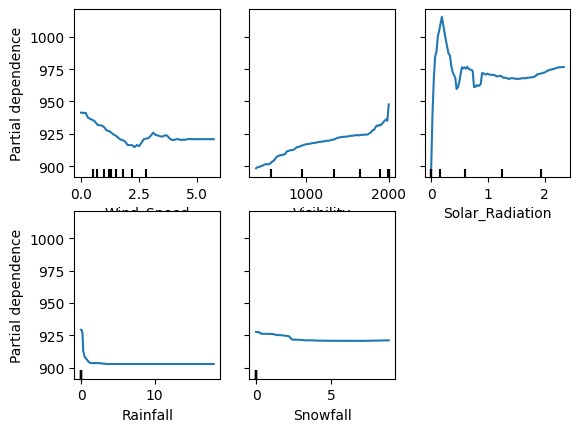

In [ ]:
features = [3,4,5,6,7]
PartialDependenceDisplay.from_estimator(rf, X_train, features, target=0)

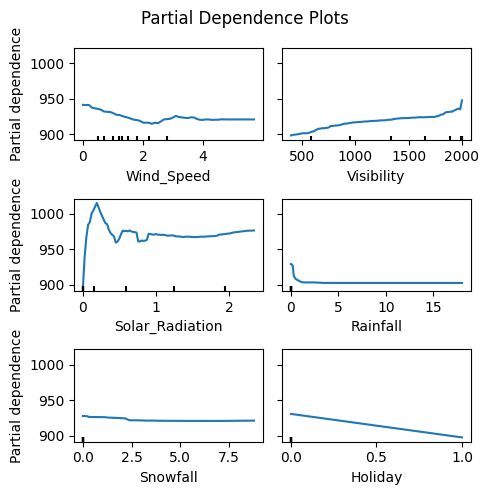

In [ ]:
n_cols = 2
n_rows = int(6/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(5, 5))
PartialDependenceDisplay.from_estimator(rf, X_train, features=[3,4,5,6,7,8], ax=ax, target=0)
fig.suptitle('Partial Dependence Plots')
fig.tight_layout();

**Observations**
- It looks like Hour is playing a significant part in the counts of bikes rented. Temperature is also significant. Solar_radiation, weekday and humidity are next. The remaining predictors have little effect on the final count.

In [ ]:
import numpy as np
# Illustration on testing data
# randomly select 15 rows from the testing data
# Set random state
np.random.seed(42)

indices = np.random.choice(len(X_test), 15, replace=False)
X_test_sample = X_test.iloc[indices]
y_test_sample = y_test.iloc[indices]

# predict using the RF model
y_pred_sample = rf.predict(X_test_sample)

# concatenate the predicted and true values with the predictors in a dataframe
df_sample = pd.concat([X_test_sample.reset_index(drop=True),
                       pd.Series(y_test_sample).reset_index(drop=True),
                       pd.Series(y_pred_sample).reset_index(drop=True)], axis=1)
df_sample.columns = list(X_test_sample.columns) + ['True', 'Pred']
df_sample

,Hour,Temperature,Humidity,Wind_Speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Holiday,Weekday,True,Pred
0,14,10.1,37,2.4,1723,1.24,0.0,0.0,0,7,1054,879.758333
1,14,15.0,37,1.6,1703,1.82,0.0,0.0,0,2,928,1013.701667
2,6,19.8,82,0.5,2000,0.00,0.0,0.0,0,3,676,650.143333
3,12,24.3,59,1.5,2000,1.12,0.0,0.0,0,4,1119,1077.511667
4,9,19.9,51,0.6,1906,1.46,0.0,0.0,0,6,956,1018.741667
5,14,19.9,29,1.9,1833,2.09,0.0,0.0,0,2,1113,1262.758333
6,19,13.8,81,1.5,760,0.00,0.0,0.0,0,3,1176,1420.201667
7,22,3.0,59,1.1,1218,0.00,0.0,0.0,0,4,726,791.868333
8,19,25.4,50,0.6,2000,0.07,0.0,0.0,0,3,2443,2364.115000
9,6,7.6,75,0.6,1181,0.00,0.0,0.0,0,7,172,170.768333


**Illustrating model predictions**
- 15 random samples were chosen from the testing data, their predictions are compared with true values
- It looks like 6 out of 10 times the prediction is with a 10% margin

In [ ]:
rf.predict(X_test)[y_test<50]

array([ 72.75333333,  92.14      , 434.9       , 162.80666667,
       142.11333333,  58.55333333,  33.02      ,  32.46      ,
       536.85333333])

- Compared with regression models, Random Forest performs better at predicting smaller values

#### **Construct a confidence interval for Random Forest predictions**

- Using bootstrapping, **Bootstrapping** is a resampling method where we randomly sample with replacement from our training dataset to create new datasets of the same size as our original dataset. We then fit a random forest model to each of these bootstrapped datasets and obtain a prediction for our test set.

In [5]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Set the number of bootstrap samples
n_bootstrap = 100

# Set random state
np.random.seed(88)
indices = np.random.choice(len(X_test), 15, replace=False)

# select 15 testing data
X_test_sample = X_test.iloc[indices]
y_test_sample = y_test.iloc[indices]

# need to grab indices from sample cuz indices is the positions
indices = X_test_sample.index

# Loop over the selected data points
results = pd.concat([X_test_sample, y_test_sample], axis = 1)

results['y_pred_mean'] = None
results['y_pred_lower'] = None
results['y_pred_upper'] = None

for i in indices:
    x = pd.DataFrame(X_test_sample.loc[i]).transpose()
    y_true = y_test_sample.loc[i]
    
    # Bootstrap the predictions
    y_pred_boot = []
    for j in range(n_bootstrap):
        # Draw bootstrap sample from X_train
        indices = np.random.choice(len(X_train), size=500, replace=True)

        # select rows from X and y using the indices
        X_train_bootstrap = X_train.iloc[indices]
        y_train_bootstrap = y_train.iloc[indices]

        # Fit random forest model on bootstrap sample
        rf_bootstrap = RandomForestRegressor(n_estimators=100, random_state=42)
        rf_bootstrap.fit(X_train_bootstrap, y_train_bootstrap)
        
        # Predict on X_test
        y_pred = rf_bootstrap.predict(x)
        y_pred_boot.append(y_pred)

    # Append results to dataframe
    results.loc[i, 'y_pred_mean'] = np.mean(y_pred_boot)
    results.loc[i, 'y_pred_lower'] = np.percentile(y_pred_boot, 2.5)
    results.loc[i, 'y_pred_upper'] = np.percentile(y_pred_boot, 97.5)

# Convert results to a dataframe
results.sort_values(by='Bike',ascending=False)

,Hour,Temperature,Humidity,Wind_Speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Holiday,Weekday,Bike,y_pred_mean,y_pred_lower,y_pred_upper
432,18,20.9,77,0.6,2000,0.23,0.0,0.0,0,5,2235,2017.6442,1639.3705,2404.2955
887,16,20.3,44,2.2,793,1.09,0.0,0.0,0,1,1413,1482.5178,1315.6805,1744.6705
611,11,22.3,50,1.3,2000,2.36,0.0,0.0,0,6,1284,1049.0486,961.7455,1149.78825
411,22,18.4,85,2.1,1772,0.00,0.0,0.0,0,4,1049,905.4937,411.48175,1358.0325
1490,7,3.4,72,1.0,1989,0.00,0.0,0.0,0,1,1004,972.7786,662.827,1204.55775
993,10,13.8,44,1.5,1953,1.66,0.0,0.0,0,5,850,941.8081,868.2945,1044.66925
1457,15,10.2,58,2.0,573,0.29,0.0,0.0,0,7,832,856.4783,703.03925,1033.175
1179,9,8.3,55,4.0,1853,0.89,0.0,0.0,0,6,785,921.0952,814.50625,1055.835
1857,23,5.8,34,2.6,763,0.00,0.0,0.0,0,2,593,795.487,677.5025,970.493
1639,23,7.0,55,0.2,1501,0.00,0.0,0.0,0,7,532,739.1075,643.7925,887.87625


In [6]:
results

,Hour,Temperature,Humidity,Wind_Speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Holiday,Weekday,Bike,y_pred_mean,y_pred_lower,y_pred_upper
1360,5,6.6,73,0.3,1219,0.00,0.0,0.0,0,7,112,166.3497,129.086,218.869
432,18,20.9,77,0.6,2000,0.23,0.0,0.0,0,5,2235,2017.6442,1639.3705,2404.2955
141,3,21.5,85,0.1,1282,0.00,0.0,0.0,0,4,320,344.8027,247.41925,492.46475
887,16,20.3,44,2.2,793,1.09,0.0,0.0,0,1,1413,1482.5178,1315.6805,1744.6705
71,17,22.7,96,4.9,452,0.07,13.0,0.0,0,1,23,563.2869,188.65225,1210.00475
1790,8,0.4,96,3.1,33,0.00,0.0,4.0,0,6,33,197.4514,56.095,446.4465
1639,23,7.0,55,0.2,1501,0.00,0.0,0.0,0,7,532,739.1075,643.7925,887.87625
611,11,22.3,50,1.3,2000,2.36,0.0,0.0,0,6,1284,1049.0486,961.7455,1149.78825
1457,15,10.2,58,2.0,573,0.29,0.0,0.0,0,7,832,856.4783,703.03925,1033.175
993,10,13.8,44,1.5,1953,1.66,0.0,0.0,0,5,850,941.8081,868.2945,1044.66925


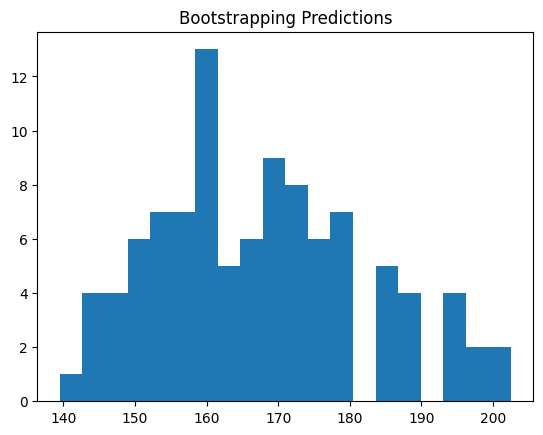

In [24]:
import matplotlib.pyplot as plt

plt.hist(y_pred_boot, bins = 20)
# set the title
plt.title("Bootstrapping Predictions")

# show the plot
plt.show()

In [ ]:
y_pred_boot

If want to make prediction, can construct confidence interval

### **Gaussian Mixture Model (abandoned)**

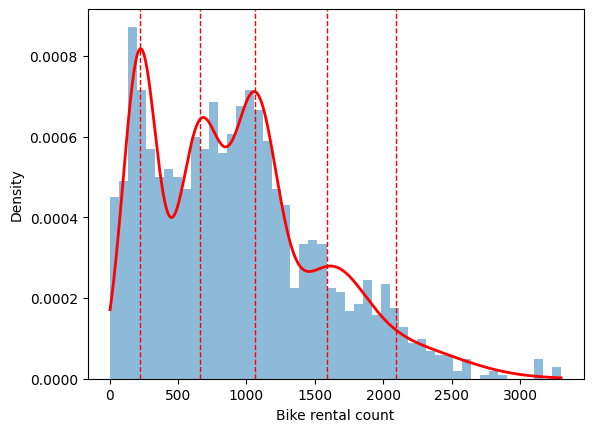

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# convert data into numpy array
y_train_array = np.array(y_train)

gmm = GaussianMixture(n_components=5)  # specify the number of components
gmm.fit(y_train_array.reshape(-1, 1))  # fit the GMM on the data

# get the means and standard deviations of the two components
means = gmm.means_.flatten()
stds = np.sqrt(gmm.covariances_.flatten())

# visualize gmm with data
# Create histogram of data
plt.hist(y_train_array, bins=50, density=True, alpha=0.5)

# Overlay estimated density function from GMM
x = np.linspace(y_train_array.min(), y_train_array.max(), 1000).reshape(-1, 1)
log_dens = gmm.score_samples(x)
dens = np.exp(log_dens)
plt.plot(x, dens, '-r', linewidth=2)

# Plot means of Gaussian distributions
for mean in gmm.means_:
    plt.axvline(mean, color='red', linestyle='--', linewidth=1)

plt.xlabel('Bike rental count')
plt.ylabel('Density')
plt.show()

In [ ]:
X_train_array = np.array(X_train)

# Obtain GMM probabilities for each sample in feature matrix
gmm_probs = gmm.predict_proba(y_train_array.reshape(-1, 1))

# Fit linear regression on feature matrix and GMM probabilities
X_train_aug = np.hstack([X_train_array, gmm_probs])
reg = LinearRegression().fit(X_train_aug, y_train_array)

In [ ]:
X_train_aug

array([[1.90000000e+01, 1.51000000e+01, 6.00000000e+01, ...,
        8.84466933e-02, 6.07118257e-05, 5.84299793e-01],
       [8.00000000e+00, 3.00000000e-01, 5.30000000e+01, ...,
        3.33791273e-01, 3.70567390e-12, 6.66168434e-01],
       [1.60000000e+01, 9.40000000e+00, 3.90000000e+01, ...,
        7.43902686e-03, 5.68654457e-02, 3.05901222e-02],
       ...,
       [1.40000000e+01, 1.89000000e+01, 3.10000000e+01, ...,
        2.82568074e-01, 3.56192244e-11, 7.17273929e-01],
       [1.20000000e+01, 1.06000000e+01, 7.20000000e+01, ...,
        1.83731015e-03, 7.93487494e-01, 2.39443343e-03],
       [1.60000000e+01, 2.04000000e+01, 3.20000000e+01, ...,
        1.48884268e-01, 4.79816198e-07, 8.17360932e-01]])

In [ ]:
from sklearn.metrics import mean_squared_error

# Assume X_test is your feature matrix with shape (n_samples, n_features)
# and y_test is your response variable with shape (n_samples,)
X_test_array = np.array(X_test)

# Obtain GMM probabilities for each sample in feature matrix
gmm_probs_test = gmm.predict_proba(X_test_array.reshape(-1, 1))

# Augment feature matrix with GMM probabilities
X_test_aug = np.hstack([X_test_array, gmm_probs_test])

# Predict response variable for X_test
y_pred = reg.predict(X_test_aug)

# Compute mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE: ", mse)

NameError: ignored

### **XGBoost Regression**

****
****

# **Conclusion**

- **Linear Regression**
  - Basic model is the worst, standardization does not help with prediction, testing MSE is about 170000
- **Log-transformation on Y**
  - Mingcheng worked on it, MSE about 97000
- **GLM**
  - Negative-binomial model is sufficient and with polynomial non-standardized predictors, it outperforms linear regression and other models. Testing MSE is about 97000
- **Kernel regression and SVM**
  - Both uses kernels and reach a performance better than basic regression but worse than GLM. Testing MSE is about 150000
- **Random Forest**
  - Outperforms all other models. Testing MSE is about 42000